# Predicting Maximum Temperature @Pune
**Input data**: Nex data 0.25 * 0.25 degree grid                                             
**Labels**: IMD maximum temperature data @Pune                                               
*Demonstration of Supervised Machine Learning Algorithms*

In [1]:
#importing required python libraries
# write training and 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#loading training sets | call imd5p5_tmax as pune_tmax
pune_tmax_train = pd.read_csv(r'D:\IITM\converted_to_csv\imd5p5_tmax_train_clean.csv')
nex25_tmax_train = pd.read_csv(r'D:\IITM\converted_to_csv\nex25_tmax_pune_train.csv')

In [3]:
#using pune tmax values as labels 
tmax_labels = pd.DataFrame(pune_tmax_train,columns=["tmax"])
tmax_labels.head() # .head() function gives out first 5 rows of the datset 

,tmax
0,28.4
1,29.4
2,29.1
3,28.3
4,28.5


In [4]:
#converting string date values to date format 
import datetime as dt
nex25_tmax_train['date'] = pd.to_datetime(nex25_tmax_train['date'])
nex25_tmax_train['date']=nex25_tmax_train['date'].map(dt.datetime.toordinal)

### Linear Regression with one feature (tmax)

In [5]:
#Linear regression using sci-kit learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(nex25_tmax_train, tmax_labels)

LinearRegression()

In [6]:
#predicting tmax with Linear Regression 
tmax_predictions = lin_reg.predict(nex25_tmax_train)

In [7]:
#calculating RMSE in labels and predictions
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(tmax_predictions, tmax_labels)
lin_rmse = np.sqrt(lin_mse)
print("RMSE for Linear regression = ")
lin_rmse

RMSE for Linear regression = 


1.7374580481947117

In [8]:
#loading test datasets
pune_tmax_test = pd.read_csv(r'D:\IITM\converted_to_csv\imd5p5_tmax_pune_test.csv')
nex25_tmax_test = pd.read_csv(r'D:\IITM\converted_to_csv\nex25_tmax_pune_test.csv')

In [9]:
#preparing labels
final_labels = pune_tmax_test["tmax"]
final_labels.head()

0    29.7
1    30.0
2    28.2
3    28.3
4    29.6
Name: tmax, dtype: float64

In [10]:
#converting string date values to date format 
import datetime as dt
nex25_tmax_test['date'] = pd.to_datetime(nex25_tmax_test['date'])
nex25_tmax_test['date']=nex25_tmax_test['date'].map(dt.datetime.toordinal)
nex25_tmax_test.head()

,date,nex_tmax
0,732312,30.0709
1,732343,30.3630
2,732371,30.2909
3,732402,30.3834
4,732432,30.0295


In [11]:
#prediction using test set
lin_reg_test = lin_reg.predict(nex25_tmax_test)

In [12]:
#calculating RMSE over test set
lin_mse_final = mean_squared_error(final_labels, lin_reg_test)
lin_rmse_final = np.sqrt(lin_mse_final)
print("RMSE for Linear regression over test set = ")
lin_rmse_final

RMSE for Linear regression over test set = 


1.7982088693288238

In [13]:
print("Slope and intercepts of the regression : ")
print(lin_reg.intercept_)
print(lin_reg.coef_)

Slope and intercepts of the regression : 
[-0.18821421]
[[1.28535311e-05 6.86445214e-01]]


In [14]:
data = np.array(lin_reg_test)
lin_reg_test = pd.DataFrame(data)
lin_reg_test.head()

,0
0,29.866606
1,30.067515
2,30.018383
3,30.082277
4,29.839730


In [15]:
nex25_tmax_train_datedrop = nex25_tmax_train.drop(['date'],axis=1)
nex25_tmax_test_datedrop = nex25_tmax_test.drop(['date'],axis=1)
nex25_tmax_train_datedrop.head()

,nex_tmax
0,30.1280
1,30.4229
2,30.4062
3,30.5158
4,30.4171


In [16]:
#Linear regression using sci-kit learn
from sklearn.linear_model import LinearRegression
lin_reg_datedrop = LinearRegression()
lin_reg_datedrop.fit(nex25_tmax_train_datedrop, tmax_labels)

LinearRegression()

In [17]:
#prediction using test set with no date
lin_reg_test_nodate = lin_reg_datedrop.predict(nex25_tmax_test_datedrop)

In [18]:
#calculating RMSE over test set
lin_mse_final_nodate = mean_squared_error(final_labels, lin_reg_test_nodate)
lin_rmse_final_nodate = np.sqrt(lin_mse_final_nodate)
print("RMSE for Linear regression over test set with no date= ")
lin_rmse_final_nodate

RMSE for Linear regression over test set with no date= 


1.797965172384784

In [19]:
print("Difference between the RMSE of predictions 'with date' and 'no date'= ")
1.7982088693288238 - 1.7979651723847843

Difference between the RMSE of predictions 'with date' and 'no date'= 


0.0002436969440395842

The first column of the dataframe is 'date' which looks like got converted to an integer(after using 'to_datetime' function) due to which we got a slight difference in the preditions. This needs to be investigated further.  

In [20]:
nex25_tmax_train.head()

,date,nex_tmax
0,721354,30.1280
1,721385,30.4229
2,721414,30.4062
3,721445,30.5158
4,721475,30.4171


In [21]:
#loading datset
nex25_tmin_train = pd.read_csv(r'D:\IITM\tmin-pr-pune-inputs\nex25_pune_tmin_train.csv')

In [22]:
nex25_tmin_train.head()

,date,tmin
0,01-01-1976,10.7089
1,02-01-1976,10.5904
2,03-01-1976,10.6063
3,04-01-1976,11.8068
4,05-01-1976,13.2873


In [23]:
nex_tmin_datedrop = nex25_tmin_train["tmin"] # datedrop is dataset of tmin without 'date' column

In [24]:
nex_tmin_datedrop.head()

0    10.7089
1    10.5904
2    10.6063
3    11.8068
4    13.2873
Name: tmin, dtype: float64

In [25]:
#concatinating different columns as per requirement
nex25_train = pd.concat([nex25_tmax_train.reset_index(drop=True), nex_tmin_datedrop.reset_index(drop=True)],axis=1) 

In [26]:
nex25_train.head()

,date,nex_tmax,tmin
0,721354,30.1280,10.7089
1,721385,30.4229,10.5904
2,721414,30.4062,10.6063
3,721445,30.5158,11.8068
4,721475,30.4171,13.2873


In [27]:
#renaming the column
nex25_train = nex25_train.rename(columns={"tmin":"nex_tmin"})

In [28]:
#generating 'nex_tmean' column
nex25_train["nex_tmean"] = ""
nex25_train.head()

,date,nex_tmax,nex_tmin,nex_tmean
0,721354,30.1280,10.7089,
1,721385,30.4229,10.5904,
2,721414,30.4062,10.6063,
3,721445,30.5158,11.8068,
4,721475,30.4171,13.2873,


In [29]:
#Calculating mean temperature 
for i in range (len(nex25_train)):
    nex25_train.iat[i,3] = (nex25_train.iat[i,1] + nex25_train.iat[i,2])/2

In [30]:
nex25_train.head()

,date,nex_tmax,nex_tmin,nex_tmean
0,721354,30.1280,10.7089,20.41845
1,721385,30.4229,10.5904,20.50665
2,721414,30.4062,10.6063,20.50625
3,721445,30.5158,11.8068,21.1613
4,721475,30.4171,13.2873,21.8522


In [31]:
#correlation matrix
nex25_train.corr()

,date,nex_tmax,nex_tmin
date,1.000000,0.084789,0.083561
nex_tmax,0.084789,1.000000,0.280715
nex_tmin,0.083561,0.280715,1.000000


In [32]:
# dropping the date column
Nex_train = nex25_train.drop(['date'],axis=1) 

In [33]:
Nex_train.head()
Nex_train.to_csv(r'D:\IITM\prepared data\Nex_train.csv')

In [34]:
#correlation matrix
Nex_train.corr()

,nex_tmax,nex_tmin
nex_tmax,1.000000,0.280715
nex_tmin,0.280715,1.000000


### Linear Regression with min, max and mean temperatures

In [35]:
#Linear regression using sci-kit learn
from sklearn.linear_model import LinearRegression
Nex_lin_reg = LinearRegression()
Nex_lin_reg.fit(Nex_train, tmax_labels)

LinearRegression()

In [36]:
#predicting  
Nex_tmax_pred_train = Nex_lin_reg.predict(Nex_train)

In [37]:
print(Nex_lin_reg.intercept_)
print(Nex_lin_reg.coef_)

[10.02484237]
[[ 2.73968744e+12  2.73968744e+12 -5.47937489e+12]]


In [38]:
#calculating RMSE over test set
Nex_lin_mse_train = mean_squared_error(tmax_labels, Nex_tmax_pred_train)
Nex_lin_rmse_train = np.sqrt(Nex_lin_mse_train)
print("RMSE for Linear regression over train set = ")
Nex_lin_rmse_train

RMSE for Linear regression over train set = 


1.6850397985925212

In [39]:
#Loading minimum temperature dataset 
nex25_tmin_test = pd.read_csv(r'D:\IITM\tmin-pr-pune-inputs\nex25_pune_tmin_test.csv')

In [40]:
#selecting only the tmin column
nex_test_tmin = nex25_tmin_test["tmin"] 

In [41]:
nex_test_tmin.head()

0    14.5580
1    14.8125
2    14.9060
3    14.2860
4    13.7385
Name: tmin, dtype: float64

In [42]:
#concatinating dataframes 
nex25_test = pd.concat([nex25_tmax_test.reset_index(drop=True), nex_test_tmin.reset_index(drop=True)],axis=1) 

In [43]:
nex25_test.head()

,date,nex_tmax,tmin
0,732312,30.0709,14.5580
1,732343,30.3630,14.8125
2,732371,30.2909,14.9060
3,732402,30.3834,14.2860
4,732432,30.0295,13.7385


In [44]:
#renaming column
nex25_test = nex25_test.rename(columns={'tmin':'nex_tmin'})

In [45]:
nex25_test.head()

,date,nex_tmax,nex_tmin
0,732312,30.0709,14.5580
1,732343,30.3630,14.8125
2,732371,30.2909,14.9060
3,732402,30.3834,14.2860
4,732432,30.0295,13.7385


In [46]:
#creating an empty column to store tmean
nex25_test["nex_tmean"] = ""
nex25_test.head()

,date,nex_tmax,nex_tmin,nex_tmean
0,732312,30.0709,14.5580,
1,732343,30.3630,14.8125,
2,732371,30.2909,14.9060,
3,732402,30.3834,14.2860,
4,732432,30.0295,13.7385,


In [47]:
#Calculating mean temperature for test set
for i in range (len(nex25_test)):
    nex25_test.iat[i,3] = (nex25_test.iat[i,1] + nex25_test.iat[i,2])/2

In [48]:
nex25_test.head()

,date,nex_tmax,nex_tmin,nex_tmean
0,732312,30.0709,14.5580,22.31445
1,732343,30.3630,14.8125,22.58775
2,732371,30.2909,14.9060,22.59845
3,732402,30.3834,14.2860,22.3347
4,732432,30.0295,13.7385,21.884


In [49]:
#dropping the date column
Nex_test = nex25_test.drop(['date'],axis=1)

In [50]:
Nex_test.head()
Nex_test.to_csv(r'D:\IITM\prepared data\Nex_test.csv')

In [51]:
nex25_test.head()

,date,nex_tmax,nex_tmin,nex_tmean
0,732312,30.0709,14.5580,22.31445
1,732343,30.3630,14.8125,22.58775
2,732371,30.2909,14.9060,22.59845
3,732402,30.3834,14.2860,22.3347
4,732432,30.0295,13.7385,21.884


In [52]:
#predicting on test set
Nex_test["pred_tmax"] = "" 
#Nex_test["pred_tmax"] = Nex_lin_reg.predict(Nex_test["nex_tmax","nex_tmin","nex_tmean"])

In [53]:
Nex_test.head()

,nex_tmax,nex_tmin,nex_tmean,pred_tmax
0,30.0709,14.5580,22.31445,
1,30.3630,14.8125,22.58775,
2,30.2909,14.9060,22.59845,
3,30.3834,14.2860,22.3347,
4,30.0295,13.7385,21.884,


In [54]:
Nex_test["pred_tmax"] = Nex_lin_reg.predict(pd.DataFrame(Nex_test,columns=['nex_tmax','nex_tmin','nex_tmean']))

In [55]:
Nex_test.head()

,nex_tmax,nex_tmin,nex_tmean,pred_tmax
0,30.0709,14.5580,22.31445,30.243592
1,30.3630,14.8125,22.58775,30.431092
2,30.2909,14.9060,22.59845,30.368592
3,30.3834,14.2860,22.3347,30.493592
4,30.0295,13.7385,21.884,30.290467


In [56]:
print("Intercept and coefficients of the regression (with tmin, tmean and tmax) : ")
print(Nex_lin_reg.intercept_)
print(Nex_lin_reg.coef_)

Intercept and coefficients of the regression (with tmin, tmean and tmax) : 
[10.02484237]
[[ 2.73968744e+12  2.73968744e+12 -5.47937489e+12]]


In [57]:
def predictions_multiple(x,y,z):
    pred=10.02484237+(2.73968744e+12*x)+(2.73968744e+12*y)+(-5.47937489e+12*z)
    return round(pred,0)

In [58]:
predictions_multiple( 30.0709, 14.5580, 22.31445)

-223134.0

Values of intercept and coeffiecient given by readily available functions in python are not consistant with the manual verification of the corresponding equation.

In [59]:
#calculating RMSE over test set
Nex_lin_mse_test = mean_squared_error(final_labels, Nex_test["pred_tmax"])
Nex_lin_rmse_test = np.sqrt(Nex_lin_mse_test)
print("RMSE for Linear regression over test set = ")
Nex_lin_rmse_test

RMSE for Linear regression over test set = 


1.7453517301672608

In [60]:
lin_reg_predictions = np.array(Nex_test["pred_tmax"])
labels = np.array(final_labels)

In [61]:
#Correlation between labels and predictions
np.corrcoef(lin_reg_predictions, final_labels)

array([[1.        , 0.80181758],
       [0.80181758, 1.        ]])

In [62]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(final_labels , Nex_test["pred_tmax"])
mse = metrics.mean_squared_error(final_labels , Nex_test["pred_tmax"])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(final_labels , Nex_test["pred_tmax"])

print("Results of predictions using Linear Regression:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of predictions using Linear Regression:
MAE: 1.3602295438309489
MSE: 3.0462526619978507
RMSE: 1.7453517301672608
R-Squared: 0.6398838569406103


In [63]:
lr_pred = pd.DataFrame(Nex_test["pred_tmax"])
lr_pred.to_csv(r'D:\IITM\Predictions\lin_reg_preditions.csv')

### Support Vector Regression (SVR) with min, max and mean temperatures

In [64]:
from sklearn import svm
tmax_svr = svm.SVR()
tmax_svr.fit(Nex_train , tmax_labels)

c:\users\narayan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [65]:
Nex_SVR_pred_train = tmax_svr.predict(Nex_train)

In [66]:
#calculating RMSE over train set for SVR
Nex_svr_mse_train = mean_squared_error(tmax_labels, Nex_SVR_pred_train)
Nex_svr_rmse_train = np.sqrt(Nex_svr_mse_train)
print("RMSE for Support Vector Regression over train set = ")
Nex_svr_rmse_train

RMSE for Support Vector Regression over train set = 


1.583548063056238

In [67]:
Nex_SVR_test = pd.DataFrame(Nex_test,columns=['nex_tmax','nex_tmin','nex_tmean'])

In [68]:
Nex_SVR_pred_test = tmax_svr.predict(Nex_SVR_test)

In [69]:
#calculating RMSE over test set for SVR
Nex_svr_mse_test = mean_squared_error(final_labels, Nex_SVR_pred_test)
Nex_svr_rmse_test = np.sqrt(Nex_svr_mse_test)
print("RMSE for Support Vector Regression over test set = ")
Nex_svr_rmse_test

RMSE for Support Vector Regression over test set = 


1.6582310303560692

In [64]:
#Converting from numpy array to pandas dataframe
data = np.array(Nex_SVR_pred_test)
Nex_SVR_pred_test = pd.DataFrame(data)
Nex_SVR_pred_test.head()

,0
0,30.435189
1,30.591495
2,30.579522
3,30.494990
4,30.267567


In [104]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(final_labels , Nex_SVR_pred_test)
mse = metrics.mean_squared_error(final_labels , Nex_SVR_pred_test)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(final_labels , Nex_SVR_pred_test)

print("Results of predictions using Support Vector Regression:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of predictions using Support Vector Regression:
MAE: 1.271083418468215
MSE: 2.749730150035751
RMSE: 1.6582310303560692
R-Squared: 0.6749375951515574


In [129]:
Nex_SVR_pred_test.to_csv(r'D:\IITM\Predictions\svr_predictions.csv')

### Decision Tree Regression using min, max and mean temperatures

In [65]:
from sklearn.tree import DecisionTreeRegressor
Nex_dtr = DecisionTreeRegressor()
Nex_dtr.fit(Nex_train, tmax_labels)

DecisionTreeRegressor()

In [66]:
Nex_dtr_pred_train = Nex_dtr.predict(Nex_train)

In [67]:
#calculating RMSE over training set for Decision tree Regressor
Nex_dtr_mse_train = mean_squared_error(tmax_labels, Nex_dtr_pred_train)
Nex_dtr_rmse_train = np.sqrt(Nex_dtr_mse_train)
print("RMSE for Linear regression over training set = ")
Nex_dtr_rmse_train

RMSE for Linear regression over training set = 


1.1760987044373904e-16

1.1760987044373904e-16 = 0.00000000000000011760987044373904

In [69]:
Nex_dtr_test = pd.DataFrame(Nex_test,columns=['nex_tmax','nex_tmin','nex_tmean'])

In [70]:
Nex_dtr_pred_test = Nex_dtr.predict(Nex_dtr_test)

In [71]:
#calculating RMSE over test set for Decision tree Regressor
Nex_dtr_mse_test = mean_squared_error(final_labels, Nex_dtr_pred_test)
Nex_dtr_rmse_test = np.sqrt(Nex_dtr_mse_test)
print("RMSE for Linear regression over test set = ")
Nex_dtr_rmse_test

RMSE for Linear regression over test set = 


2.3458211168647893

In [72]:
#Difference between rmse over training and test set
0.00000000000000011760987044373904 - 2.3458211168647893

-2.3458211168647893

Difference in RMSE (Decision Tree Regressor) of training and testing set is quite large.                                   
Looks like Decision Tree Regressor is overfitting over training set

In [105]:
mae = metrics.mean_absolute_error(final_labels , Nex_dtr_pred_test)
mse = metrics.mean_squared_error(final_labels , Nex_dtr_pred_test)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(final_labels , Nex_dtr_pred_test)

print("Results of predictions using Decision Tree Regression:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of predictions using Decision Tree Regression:
MAE: 1.8167123287671232
MSE: 5.502876712328767
RMSE: 2.3458211168647893
R-Squared: 0.349471315332225


In [132]:
dtr_pred = pd.DataFrame(Nex_dtr_pred_test)
dtr_pred.to_csv(r'D:\IITM\Predictions\dtr_predictions.csv')

### MLP Regression using min, max and mean temperatures
MLP is Multilayer Perceptron, a type of Neural Network 

In [73]:
# importing MLPRegressor from sklearn
from sklearn.neural_network import MLPRegressor
Nex_mlp_reg = MLPRegressor(random_state=1, max_iter=500).fit(Nex_train, tmax_labels)

c:\users\narayan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [74]:
Nex_mlp_pred_train = Nex_mlp_reg.predict(Nex_train)

In [75]:
#calculating RMSE over test set for MLP Regressor
Nex_mlp_mse_train = mean_squared_error(tmax_labels, Nex_mlp_pred_train)
Nex_mlp_rmse_train = np.sqrt(Nex_mlp_mse_train)
print("RMSE for MLP Regressor over train set = ",Nex_mlp_rmse_train)

RMSE for MLP Regressor over train set =  1.612582033615441


In [76]:
Nex_mlp_pred_test = Nex_mlp_reg.predict(Nex_dtr_test)

In [77]:
#calculating RMSE over test set for Multi-Layer Perceptron
Nex_mlp_mse_test = mean_squared_error(final_labels, Nex_mlp_pred_test)
Nex_mlp_rmse_test = np.sqrt(Nex_mlp_mse_test)
print("RMSE for MLP Regressor over test set = ")
Nex_mlp_rmse_test

RMSE for MLP Regressor over test set = 


1.689548276536455

In [76]:
Nex_linreg_pred = Nex_tmax_pred_test.rename(columns={"0":"pred_tmax"})

In [114]:
linreg_pred = pd.concat([pune_tmax_test.reset_index(drop=True),Nex_linreg_pred.reset_index(drop=True)],axis=1)

In [115]:
linreg_pred = linreg_pred.rename(columns={'0':'pred_tmax'})

In [116]:
linreg_pred.head()

,date,tmax,0,pred_tmax
0,01-Jan-06,29.7,30.214335,30.214335
1,02-Jan-06,30.0,30.401570,30.401570
2,03-Jan-06,28.2,30.335495,30.335495
3,04-Jan-06,28.3,30.474507,30.474507
4,05-Jan-06,29.6,30.268000,30.268000


In [106]:
mae = metrics.mean_absolute_error(final_labels , Nex_mlp_pred_test)
mse = metrics.mean_squared_error(final_labels , Nex_mlp_pred_test)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(final_labels , Nex_mlp_pred_test)

print("Results of predictions using Multi-Layer Perceptron Regression:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of predictions using Multi-Layer Perceptron Regression:
MAE: 1.310763536003698
MSE: 2.854573378747305
RMSE: 1.689548276536455
R-Squared: 0.6625434363805194


In [135]:
mlp_pred = pd.DataFrame(Nex_mlp_pred_test)
mlp_pred.to_csv(r'D:\IITM\Predictions\mlp_preditions.csv')

### Random Forest Regressor

In [80]:
#importing and training random forest regressor and training
from sklearn.ensemble import RandomForestRegressor
Nex_rfr_reg = RandomForestRegressor(n_estimators = 100, random_state=1, max_depth=3).fit(Nex_train, tmax_labels)

C:\Users\Narayan\AppData\Local\Temp/ipykernel_19732/1064165079.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Nex_rfr_reg = RandomForestRegressor(n_estimators = 100, random_state=1, max_depth=3).fit(Nex_train, tmax_labels)


In [81]:
Nex_rfr_pred_train = Nex_rfr_reg.predict(Nex_train)

In [82]:
#calculating RMSE over test set for Decision tree Regressor
Nex_rfr_mse_train = mean_squared_error(tmax_labels, Nex_rfr_pred_train)
Nex_rfr_rmse_train = np.sqrt(Nex_rfr_mse_train)
print("RMSE for Random Forest Regressor over train set = ",Nex_rfr_rmse_train)

RMSE for MLP Regressor over train set =  1.6095626768381472


In [83]:
Nex_rfr_pred_test = Nex_mlp_reg.predict(Nex_dtr_test)

In [84]:
#calculating RMSE over test set for Random Forest Regressor
Nex_rfr_mse_test = mean_squared_error(final_labels, Nex_rfr_pred_test)
Nex_rfr_rmse_test = np.sqrt(Nex_rfr_mse_test)
print("RMSE for Random Forest Regressor over test set = ")
Nex_rfr_rmse_test

RMSE for MLP Regressor over test set = 


1.689548276536455

In [107]:
mae = metrics.mean_absolute_error(final_labels , Nex_rfr_pred_test)
mse = metrics.mean_squared_error(final_labels , Nex_rfr_pred_test)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(final_labels , Nex_rfr_pred_test)

print("Results of predictions using Random Forest Tree Regression:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of predictions using Random Forest Tree Regression:
MAE: 1.310763536003698
MSE: 2.854573378747305
RMSE: 1.689548276536455
R-Squared: 0.6625434363805194


In [138]:
rfr_pred = pd.DataFrame(Nex_rfr_pred_test)
rfr_pred.to_csv(r'D:\IITM\Predictions\rfr_preditions.csv')

### Plots

#### Plot of Linear Regression Predictions
Comparing 'imd' and predictions made by Linear Regression. (On the test dataset)
x-axis = 'date'                                                                                   
y-axis = 'Maximum Temperatures'

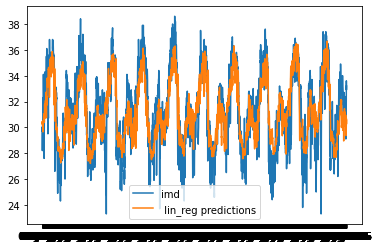

In [117]:
plt.plot(linreg_pred['date'], linreg_pred['tmax'], label ="imd")
plt.plot(linreg_pred['date'], linreg_pred['pred_tmax'], label =" lin_reg predictions")
plt.legend()

#### Plot of SVR
Comparing 'imd' data and Support Vector Regressor predictions on test dataset.

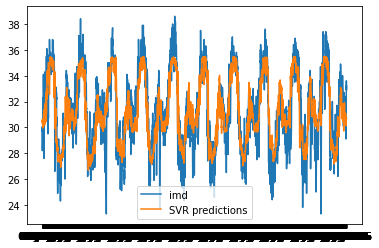

In [118]:
plt.plot(pune_tmax_test['date'], pune_tmax_test['tmax'], label ="imd")
plt.plot(pune_tmax_test['date'], Nex_SVR_pred_test, label ="SVR predictions")
plt.legend()

#### Plot Multi-layer Perceptron 
Comparing 'imd' data and MLP Regression predictions 

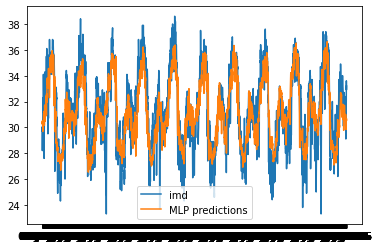

In [119]:
plt.plot(pune_tmax_test['date'], pune_tmax_test['tmax'], label ="imd")
plt.plot(pune_tmax_test['date'], Nex_mlp_pred_test, label ="MLP predictions")
plt.legend()

#### Plot of Random Forest Regressor
Comparing 'imd' data and Random Forest Regression predictions

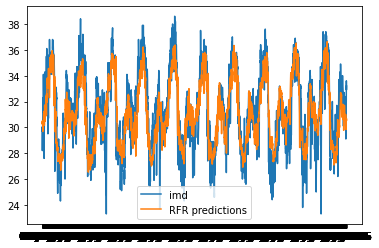

In [85]:
plt.plot(pune_tmax_test['date'], pune_tmax_test['tmax'], label ="imd")
plt.plot(pune_tmax_test['date'], Nex_rfr_pred_test, label ="RFR predictions")
plt.legend()

### Table of results

|Model||RMSE over training set|	|RMSE over test set||R^2 over test set|
|----||----||----||----|
|Linear Regression (one feature)||~1.737||~1.798|||
|Linear Regression (three features)||~1.685||~1.747||0.640|
|Support Vector Regressor||~1.584||~1.658||0.675|
|MLP Regressor||~1.613||~1.690||0.663|
|Decision Tree Regressor||~1.315E-16||~2.339||0.350|
|Random Forest Regressor||~1.610||~1.690||0.663|